### Part B
### Question 1

Precision in image edge detection means how many detected edges are acturally edge, while recall meatures how many edges are being detected. So having a high precision meaning mostly correct, but cannot say if the detector missed may edges. And vice versa. Therefore both precision and recall are important when evaluating an edge detector.


### Question 2

We used the precision_recall_fscore_support function from sklearn.metrics to calculate the precision, recall and F score at the same time. As for input, we used np.ravel to make both GT image and detected edge image into a binary list as true value and predicted value perspectively. 

Another problem is that, each method have different threshold. For example, Canny threshold ranges from 0 to 1000, Sobel is from 0 to 0.6, LoG (Laplace of Gaussian) is from 0 to 30. I normalized the threshold by dividing each range into 10 points, so that each method per image have 10 data points.

Then we calculated each three method on each three images, so its 3x3 graph ploted. We plot the three method of one image in one graph, so the result is shown below.

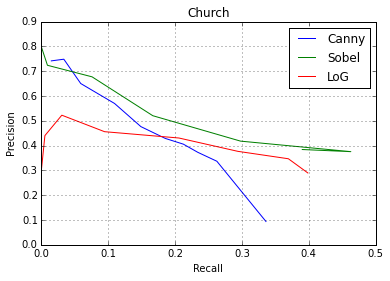

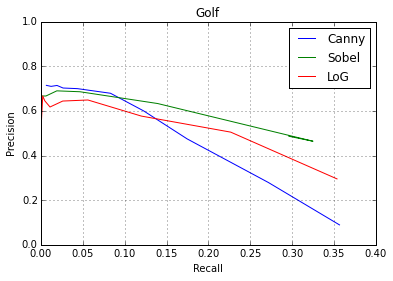

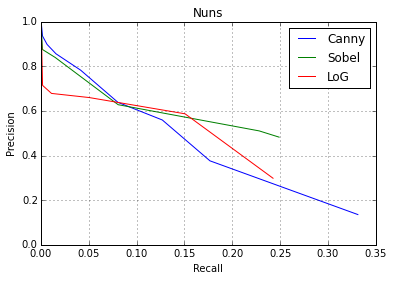

In [161]:
def pecision_recall(pe,re,fs,gt,ed):
    y_true = np.ravel(gt)
    y_pred = np.ravel(ed)
    a,b,c,d = precision_recall_fscore_support(y_true, y_pred,average='binary')
    pe.append(a)
    re.append(b)
    fs.append(c)
    
def plot(st):
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc=1)
    plt.title(st)
    plt.grid(True)
    plt.show()
    
    
#Canny
thres_can = np.arange(0,1000,100)
peci_can_1 = []
recall_can_1 = []
fscore_can_1 = []
peci_can_2 = []
recall_can_2 = []
fscore_can_2 = []
peci_can_3 = []
recall_can_3 = []
fscore_can_3 = []
for i in range(len(thres_can)):
    can_edge1,can_edge2,can_edge3 = cannythres(thres_can[i],thres_can[i])
    pecision_recall(peci_can_1,recall_can_1,fscore_can_1,im1gt,can_edge1)
    pecision_recall(peci_can_2,recall_can_2,fscore_can_2,im2gt,can_edge2)
    pecision_recall(peci_can_3,recall_can_3,fscore_can_3,im3gt,can_edge3)

#Sobel
thres_sob = np.arange(0,1,0.1)
peci_sob_1 = []
recall_sob_1 = []
fscore_sob_1 = []
peci_sob_2 = []
recall_sob_2 = []
fscore_sob_2 = []
peci_sob_3 = []
recall_sob_3 = []
fscore_sob_3 = []
for j in range(len(thres_sob)):
    sob_edge1,sob_edge2,sob_edge3 = sobthres(thres_sob[j])
    pecision_recall(peci_sob_1,recall_sob_1,fscore_sob_1,im1gt,sob_edge1)
    pecision_recall(peci_sob_2,recall_sob_2,fscore_sob_2,im2gt,sob_edge2)
    pecision_recall(peci_sob_3,recall_sob_3,fscore_sob_3,im3gt,sob_edge3)
    
#LoG
thres_log = np.arange(0,30,3)
peci_log_1 = []
recall_log_1 = []
fscore_log_1 = []
peci_log_2 = []
recall_log_2 = []
fscore_log_2 = []
peci_log_3 = []
recall_log_3 = []
fscore_log_3 = []
for k in range(len(thres_log)):
    log_edge1,log_edge2,log_edge3 = LogPlot(2,thres_log[k])
    pecision_recall(peci_log_1,recall_log_1,fscore_log_1,im1gt,log_edge1)
    pecision_recall(peci_log_2,recall_log_2,fscore_log_2,im2gt,log_edge2)
    pecision_recall(peci_log_3,recall_log_3,fscore_log_3,im3gt,log_edge3)

plt.plot(recall_can_1, peci_can_1,label='Canny')
plt.plot(recall_sob_1, peci_sob_1,label='Sobel')
plt.plot(recall_log_1, peci_log_1,label='LoG')
plot('Church')
plt.plot(recall_can_2, peci_can_2,label='Canny')
plt.plot(recall_sob_2, peci_sob_2,label='Sobel')
plt.plot(recall_log_2, peci_log_2,label='LoG')
plot('Golf')
plt.plot(recall_can_3, peci_can_3,label='Canny')
plt.plot(recall_sob_3, peci_sob_3,label='Sobel')
plt.plot(recall_log_3, peci_log_3,label='LoG')
plot('Nuns')

### Question 3

In order to widen the edge without blurring it, we convolved the GT image with a 3x3 filter, which is 0 at corner and 1 at four directions and 1 at the center, so that for each pixel, as long as there is a 1 that is 1 pixel away from it, it can be considered as 1. As a result, each edge pixel is expanded to 1 pixel on all four directions. 

As shown in the graphs below, all images' PR curve are significantly closer to the upper right corner, which means that all three detectors are more accurate on each images.

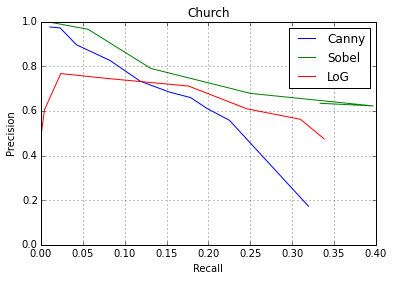

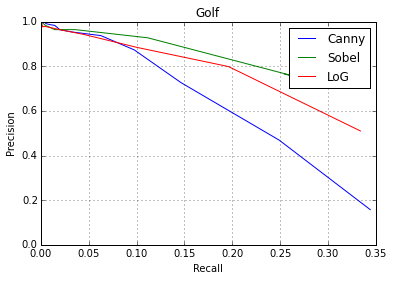

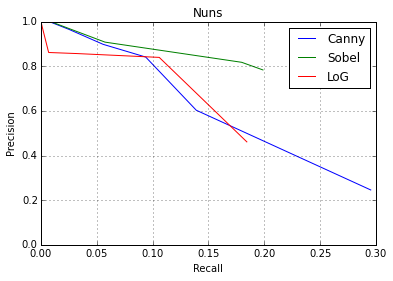

In [162]:
def wider(im): 
    k = np.array([[0, 1, 0], 
                  [1, 1, 1], 
                  [0, 1, 0]])
    x = signal.convolve2d(im, k, boundary='symm', mode='same')
    w, h = x.shape[0], x.shape[1]
    for i in range(w):
        for j in range(h):
            if (x[i][j] > 0):
                x[i][j]=1 
    return x

x = wider(im1gt)
y = wider(im2gt)
z = wider(im3gt)
    
    
#Canny
thres_can = np.arange(0,1000,100)
peci_can_1 = []
recall_can_1 = []
fscore_can_1 = []
peci_can_2 = []
recall_can_2 = []
fscore_can_2 = []
peci_can_3 = []
recall_can_3 = []
fscore_can_3 = []
for i in range(len(thres_can)):
    can_edge1,can_edge2,can_edge3 = cannythres(thres_can[i],thres_can[i])
    pecision_recall(peci_can_1,recall_can_1,fscore_can_1,x,can_edge1)
    pecision_recall(peci_can_2,recall_can_2,fscore_can_2,y,can_edge2)
    pecision_recall(peci_can_3,recall_can_3,fscore_can_3,z,can_edge3)

#Sobel
thres_sob = np.arange(0,1,0.1)
peci_sob_1 = []
recall_sob_1 = []
fscore_sob_1 = []
peci_sob_2 = []
recall_sob_2 = []
fscore_sob_2 = []
peci_sob_3 = []
recall_sob_3 = []
fscore_sob_3 = []
for j in range(len(thres_sob)):
    sob_edge1,sob_edge2,sob_edge3 = sobthres(thres_sob[j])
    pecision_recall(peci_sob_1,recall_sob_1,fscore_sob_1,x,sob_edge1)
    pecision_recall(peci_sob_2,recall_sob_2,fscore_sob_2,y,sob_edge2)
    pecision_recall(peci_sob_3,recall_sob_3,fscore_sob_3,z,sob_edge3)
    
#LoG
thres_log = np.arange(0,30,3)
peci_log_1 = []
recall_log_1 = []
fscore_log_1 = []
peci_log_2 = []
recall_log_2 = []
fscore_log_2 = []
peci_log_3 = []
recall_log_3 = []
fscore_log_3 = []
for k in range(len(thres_log)):
    log_edge1,log_edge2,log_edge3 = LogPlot(2,thres_log[k])
    pecision_recall(peci_log_1,recall_log_1,fscore_log_1,x,log_edge1)
    pecision_recall(peci_log_2,recall_log_2,fscore_log_2,y,log_edge2)
    pecision_recall(peci_log_3,recall_log_3,fscore_log_3,z,log_edge3)

plt.plot(recall_can_1, peci_can_1,label='Canny')
plt.plot(recall_sob_1, peci_sob_1,label='Sobel')
plt.plot(recall_log_1, peci_log_1,label='LoG')
plot('Church')
plt.plot(recall_can_2, peci_can_2,label='Canny')
plt.plot(recall_sob_2, peci_sob_2,label='Sobel')
plt.plot(recall_log_2, peci_log_2,label='LoG')
plot('Golf')
plt.plot(recall_can_3, peci_can_3,label='Canny')
plt.plot(recall_sob_3, peci_sob_3,label='Sobel')
plt.plot(recall_log_3, peci_log_3,label='LoG')
plot('Nuns')

### Question 4

We plot the F-measure as the same way in question 2. The result shows that Sobel has the best result overall, because the highest point in each image is the Sobel filter. Even though Sobel doesn't have good performance as threshold goes up, it doesn't matteres to the result becasue the threshold can always be set as the highest point in each line. 

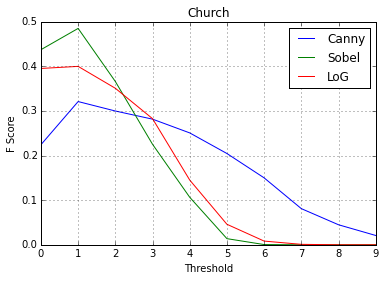

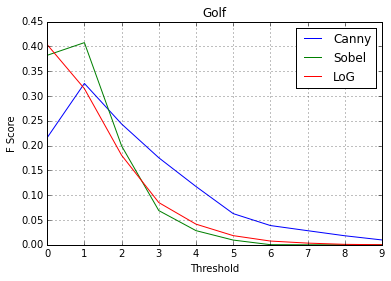

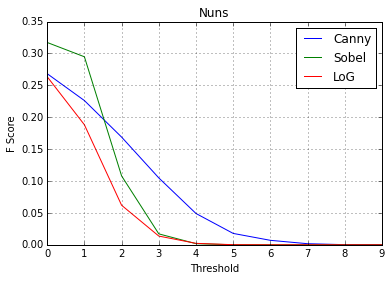

In [163]:
def plotf(st):
    plt.xlabel('Threshold')
    plt.ylabel('F Score')
    plt.legend(loc=1)
    plt.title(st)
    plt.grid(True)
    plt.show()
    
x = np.arange(0,10)

plt.plot(x,fscore_can_1,label='Canny')
plt.plot(x,fscore_sob_1,label='Sobel')
plt.plot(x,fscore_log_1,label='LoG')
plotf('Church')
plt.plot(x,fscore_can_2, label='Canny')
plt.plot(x,fscore_sob_2, label='Sobel')
plt.plot(x,fscore_log_2, label='LoG')
plotf('Golf')
plt.plot(x,fscore_can_3, label='Canny')
plt.plot(x,fscore_sob_3, label='Sobel')
plt.plot(x,fscore_log_3, label='LoG')
plotf('Nuns')